In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
books = pd.read_csv('books.csv')
users = pd.read_csv('users.csv')
ratings = pd.read_csv('ratings.csv')

C:\Users\HP\AppData\Local\Temp\ipykernel_16160\3819754567.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('books.csv')


In [3]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [5]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [6]:
print(books.shape)
print(users.shape)
print(ratings.shape)

(271360, 8)
(278858, 3)
(1149780, 3)


## Checking Missing Values

In [7]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [8]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [9]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [10]:
books.duplicated().sum()

0

In [11]:
users.duplicated().sum()

0

In [12]:
ratings.duplicated().sum()

0

## Categorical columns

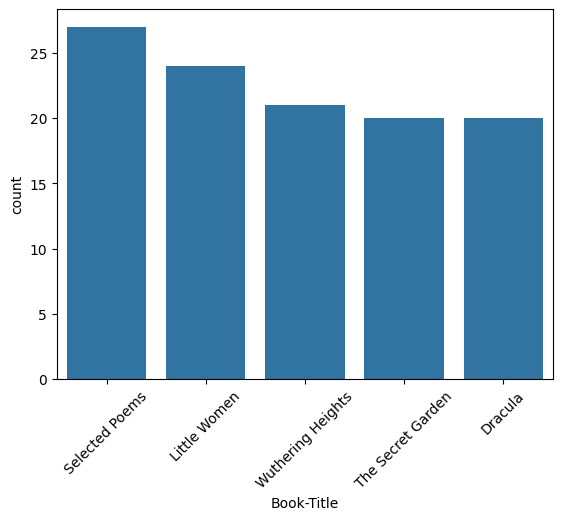

In [13]:
sns.countplot(x='Book-Title',data=books,order=books['Book-Title'].value_counts().iloc[:5].index)
plt.xticks(rotation=45)
plt.show()

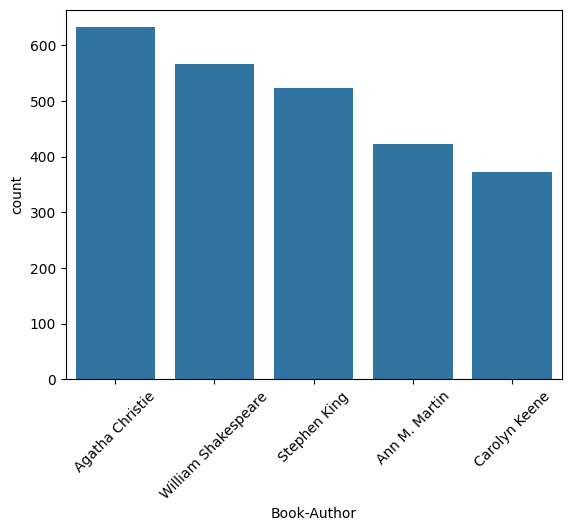

In [14]:
sns.countplot(x='Book-Author',data=books,order=books['Book-Author'].value_counts().iloc[:5].index)
plt.xticks(rotation=45)
plt.show()

<Axes: ylabel='count'>

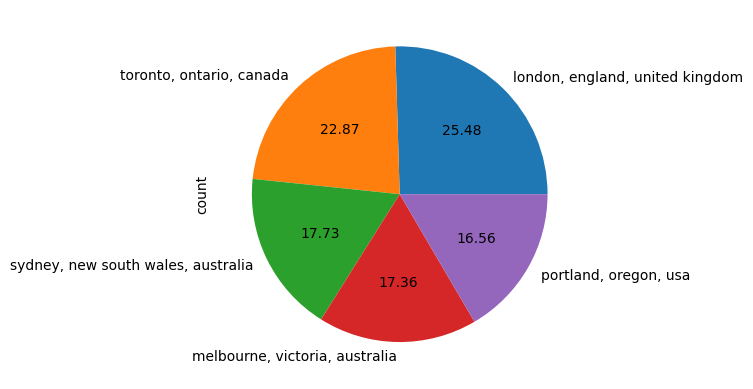

In [15]:
users['Location'].value_counts().iloc[:5].plot(kind='pie',autopct='%.2f')

## Numerical Columns

(array([717879.,   8755.,  59878., 113381., 249887.]),
 array([ 0.,  2.,  4.,  6.,  8., 10.]),
 <BarContainer object of 5 artists>)

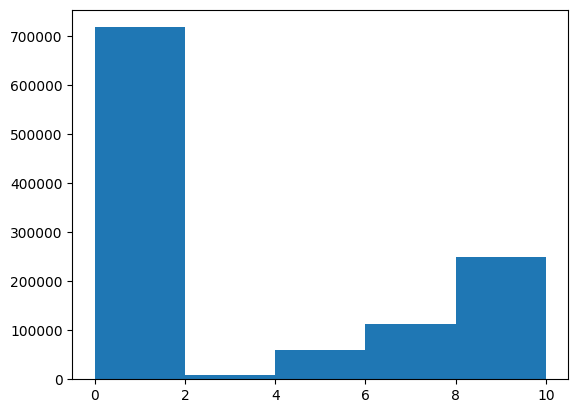

In [16]:
plt.hist(ratings['Book-Rating'],bins=5)

C:\Users\HP\AppData\Local\Temp\ipykernel_16160\568729093.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(users['Age'])


<Axes: xlabel='Age', ylabel='Density'>

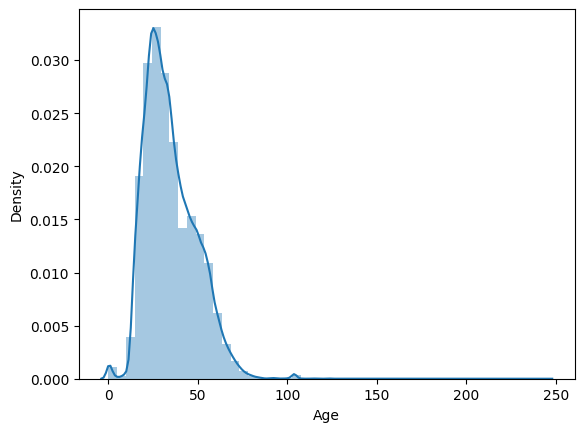

In [17]:
sns.distplot(users['Age'])

<Axes: xlabel='Age'>

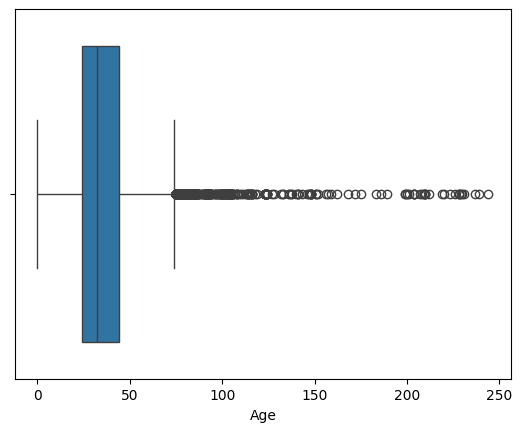

In [18]:
sns.boxplot(x=users['Age'])

## Bivariate Analysis

<Axes: xlabel='Age', ylabel='Book-Rating'>

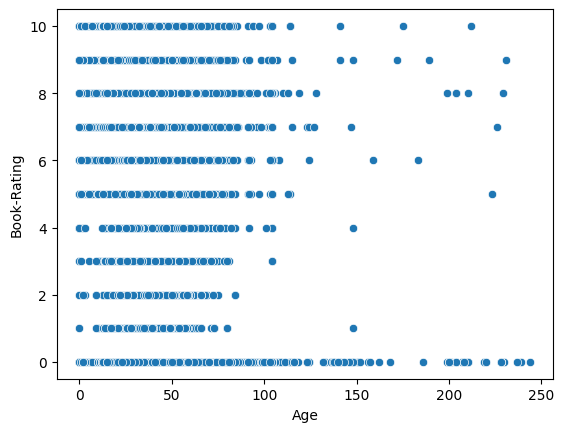

In [19]:
sns.scatterplot(x=users['Age'],y=ratings['Book-Rating'])

In [20]:
# sns.barplot(x=books['Publisher'],y=ratings['Book-Rating'])

In [21]:
books['Publisher'].value_counts()

Publisher
Harlequin                  7535
Silhouette                 4220
Pocket                     3905
Ballantine Books           3783
Bantam Books               3646
                           ... 
Hannover House                1
Amber Quill Press, LLC.       1
Lunchbox Press                1
Ugly Town                     1
Connaught                     1
Name: count, Length: 16807, dtype: int64

# Popularity Based Recommender System

In [22]:
ratings_with_name = ratings.merge(books, on='ISBN')

In [23]:
ratings_with_name

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...
...,...,...,...,...,...,...,...,...,...,...
1031131,276704,0876044011,0,Edgar Cayce on the Akashic Records: The Book o...,Kevin J. Todeschi,1998,A.R.E. Press (Association of Research &amp; Enlig,http://images.amazon.com/images/P/0876044011.0...,http://images.amazon.com/images/P/0876044011.0...,http://images.amazon.com/images/P/0876044011.0...
1031132,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000,Longstreet Press,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...
1031133,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997,Alfred A. Knopf,http://images.amazon.com/images/P/0679447156.0...,http://images.amazon.com/images/P/0679447156.0...,http://images.amazon.com/images/P/0679447156.0...
1031134,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996,Jove Books,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...


In [24]:
num_rating_df = ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
num_rating_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [25]:
avg_rating_df = ratings_with_name.groupby('Book-Title').mean(numeric_only=True)['Book-Rating'].reset_index()
avg_rating_df.rename(columns={'Book-Rating':'avg_rating'},inplace=True)
avg_rating_df

,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [26]:
popular_df = num_rating_df.merge(avg_rating_df, on='Book-Title')
popular_df

,Book-Title,num_ratings,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [27]:
popular_df = popular_df[popular_df['num_ratings']>=250].sort_values('avg_rating',ascending=False).head(50)

In [28]:
popular_df = popular_df.merge(books, on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','num_ratings','avg_rating']]

In [29]:
popular_df['Image-URL-M'][0]

'http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg'

## Collaborative Filtering Based Recommendation System

In [30]:
x = ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 200 
padhe_likhe_users = x[x].index

In [31]:
filtered_rating = ratings_with_name[ratings_with_name['User-ID'].isin(padhe_likhe_users)]

In [32]:
y = filtered_rating.groupby('Book-Title').count()['Book-Rating'] >= 50
famous_books = y[y].index

In [33]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

In [34]:
pt = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [35]:
pt.fillna(0,inplace=True)

In [36]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
from sklearn.metrics.pairwise import cosine_similarity

In [38]:
similarity_scores = cosine_similarity(pt)

In [39]:
similarity_scores[0]

array([1.        , 0.10255025, 0.01220856, 0.        , 0.05367224,
       0.02774901, 0.08216491, 0.13732869, 0.03261686, 0.03667591,
       0.02322418, 0.06766487, 0.02083978, 0.09673735, 0.13388865,
       0.08303112, 0.11153543, 0.05100411, 0.02517784, 0.11706383,
       0.        , 0.14333793, 0.07847534, 0.06150451, 0.08723968,
       0.        , 0.07009814, 0.13658681, 0.07600328, 0.12167134,
       0.00768046, 0.01473221, 0.        , 0.07965814, 0.04522617,
       0.01556271, 0.09495938, 0.0182307 , 0.02610465, 0.07984012,
       0.11679969, 0.0569124 , 0.08354155, 0.08471898, 0.08785938,
       0.05491435, 0.0548505 , 0.27026514, 0.09779123, 0.06016046,
       0.08958835, 0.06748675, 0.        , 0.04468098, 0.01920872,
       0.        , 0.05629067, 0.00557964, 0.07877059, 0.05219479,
       0.18908177, 0.        , 0.01240656, 0.02984572, 0.04279502,
       0.12680125, 0.16566735, 0.        , 0.13357242, 0.06615478,
       0.        , 0.        , 0.        , 0.10968075, 0.02806

In [60]:
def recommend(book_name):
    # index fetch
    index = np.where(pt.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:5]
    
    data=[]
    for i in similar_items:
        item=[]
        temp_df=books[books['Book-Title']==pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))

        data.append(item)

    return data

In [61]:
recommend('Harry Potter and the Chamber of Secrets (Book 2)')

[['Harry Potter and the Prisoner of Azkaban (Book 3)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg'],
 ['Harry Potter and the Goblet of Fire (Book 4)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0439139597.01.MZZZZZZZ.jpg'],
 ["Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))",
  'J. K. Rowling',
  'http://images.amazon.com/images/P/059035342X.01.MZZZZZZZ.jpg'],
 ["Harry Potter and the Sorcerer's Stone (Book 1)",
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0590353403.01.MZZZZZZZ.jpg']]

In [42]:
pt.index[545]

"The Handmaid's Tale"

In [43]:
import pickle
pickle.dump(popular_df,open('popular.pkl','wb'))

In [62]:
pickle.dump(pt,open('pt.pkl','wb'))
pickle.dump(books,open('books.pkl','wb'))
pickle.dump(similarity_scores,open('similarity_scores.pkl','wb'))